# Predicting Occurence of Strokes

## 1. Obtaining and Reviewing Raw Data

In [1]:
# Importing Neccessary Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

# Reading data
df = pd.read_csv('/Users/danielyu/Desktop/healthcare-dataset-stroke-data.csv')

# Data Columns
df.info()

# Summary Statistics
df.describe()

# Summary Statistics
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 2. Data Preprocessing

In [2]:
# Dropping the row for 'Other' gender 
delete_row = df.loc[df['gender'].str.contains("Other", case=False)]
df_drop = df.drop(labels=delete_row.index, axis=0)

# Finding Null Values in columns
df.isnull().sum()

# Finding mean bmi 
mean_bmi = df_drop['bmi'].dropna().mean()

# Copy dataframe 
df_copy = df_drop.copy()

# Replace Null values with mean bmi
df_copy['bmi'].fillna(int(mean_bmi), inplace = True)

# Check dataframe to see whether the null values have been removed
df_copy.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [3]:
# Creatimg dictionary to assign numerical values to string categories
gender_num = {'Male': 0, 'Female': 1}
ever_married_num = {'No':0, 'Yes':1}
work_type_num = {'children': 0, 'Never_worked': 1, 'Govt_job': 2, 'Private': 3, 'Self-employed': 4}
residence_type_num = {'Rural': 0, 'Urban': 1}
smoking_status_num = {'Unknown': 0, 'never smoked': 1, 'formerly smoked':2, 'smokes': 3}

# Mapping values to the dataframe
df_copy['gender'] = df_copy['gender'].map(gender_num)
df_copy['ever_married'] = df_copy['ever_married'].map(ever_married_num)
df_copy['work_type'] = df_copy['work_type'].map(work_type_num)
df_copy['Residence_type'] = df_copy['Residence_type'].map(residence_type_num)
df_copy['smoking_status'] = df_copy['smoking_status'].map(smoking_status_num)

## 3. Correlation between Variables

In [4]:
# Drop 'id' column not required for correlation matrix
df_iddrop = df_copy.drop(['id'], axis=1)

# Creating a correlation matrix
corr_metrics_all = df_iddrop.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson' )
corr_metrics_all.style.background_gradient()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.015024,-0.021223,0.085685,-0.030171,-0.065848,-0.006105,0.007023,0.028637,-0.038918,0.009081
age,-0.015024,1.000000,-0.221835,0.202414,0.549578,0.292823,0.018922,0.071655,0.148743,0.285635,0.214003
hypertension,-0.021223,-0.221835,1.000000,-0.108292,-0.164187,-0.075150,0.007980,-0.048336,-0.038218,-0.129133,-0.127891
heart_disease,0.085685,0.202414,-0.108292,1.000000,0.114601,0.058301,0.003045,0.054081,0.088734,0.064753,0.134905
ever_married,-0.030171,0.549578,-0.164187,0.114601,1.000000,0.376238,0.005988,0.027844,0.113992,0.304206,0.108299
work_type,-0.065848,0.292823,-0.075150,0.058301,0.376238,1.000000,-0.014426,0.028647,0.178974,0.307641,0.058261
Residence_type,-0.006105,0.018922,0.007980,0.003045,0.005988,-0.014426,1.000000,0.006394,-0.029651,-0.004369,0.015415
avg_glucose_level,0.007023,0.071655,-0.048336,0.054081,0.027844,0.028647,0.006394,1.000000,0.111363,0.014208,0.350598
bmi,0.028637,0.148743,-0.038218,0.088734,0.113992,0.178974,-0.029651,0.111363,1.000000,0.093603,0.191681
smoking_status,-0.038918,0.285635,-0.129133,0.064753,0.304206,0.307641,-0.004369,0.014208,0.093603,1.000000,0.066471


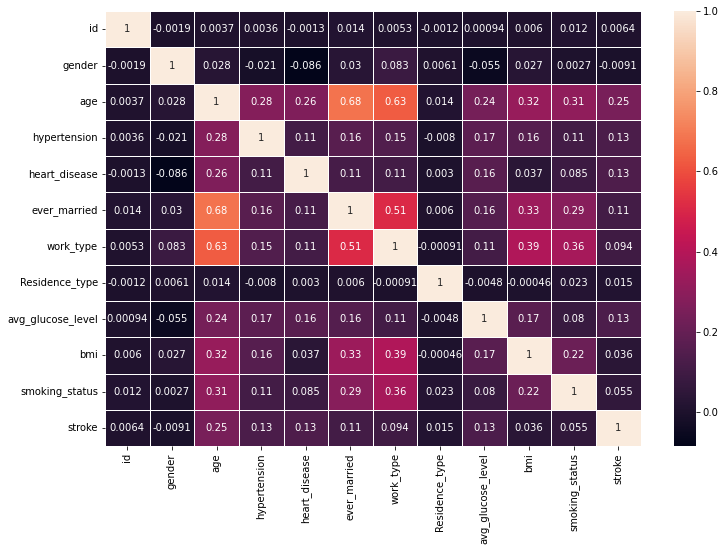

In [5]:
corr = df_copy.corr()
fig = plt.figure(figsize=(12, 8))
ax = sns.heatmap(corr, annot=True, linewidths=.5)
plt.show()

## 4. Exploratory Data Analysis

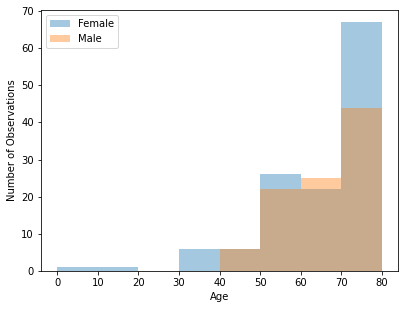

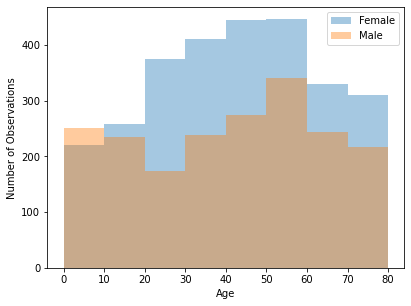

In [6]:
df_stroke_female = df_copy[(df_copy['gender'] == 1) & (df_copy['stroke'] == 1)]
df_nostroke_female = df_copy[(df_copy['gender'] == 1) & (df_copy['stroke'] == 0)]
df_stroke_male = df_copy[(df_copy['gender'] == 0) & (df_copy['stroke'] == 1)]
df_nostroke_male = df_copy[(df_copy['gender'] == 0) & (df_copy['stroke'] == 0)]



# Age where people had strokes by gender
fig, ax = plt.subplots() # create figure and axis objects
fig.set_size_inches(6.4,4.8)
ax.hist(df_stroke_female['age'], label = "Female", alpha = 0.4, bins = [0,10,20,30,40,50,60,70,80]) 
ax.hist(df_stroke_male['age'], label = "Male", alpha = 0.4, bins = [0,10,20,30,40,50,60,70,80]) 
ax.set_xlabel("Age")
ax.set_ylabel("Number of Observations")
ax.legend() # add a legend
plt.show()

# Age where people did not strokes by gender
fig, ax = plt.subplots() # create figure and axis objects
fig.set_size_inches(6.4,4.8)
ax.hist(df_nostroke_female['age'], label = "Female", alpha = 0.4, bins = [0,10,20,30,40,50,60,70,80]) 
ax.hist(df_nostroke_male['age'], label = "Male", alpha = 0.4, bins = [0,10,20,30,40,50,60,70,80]) 
ax.set_xlabel("Age")
ax.set_ylabel("Number of Observations")
ax.legend() # add a legend
plt.show()

/Users/danielyu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


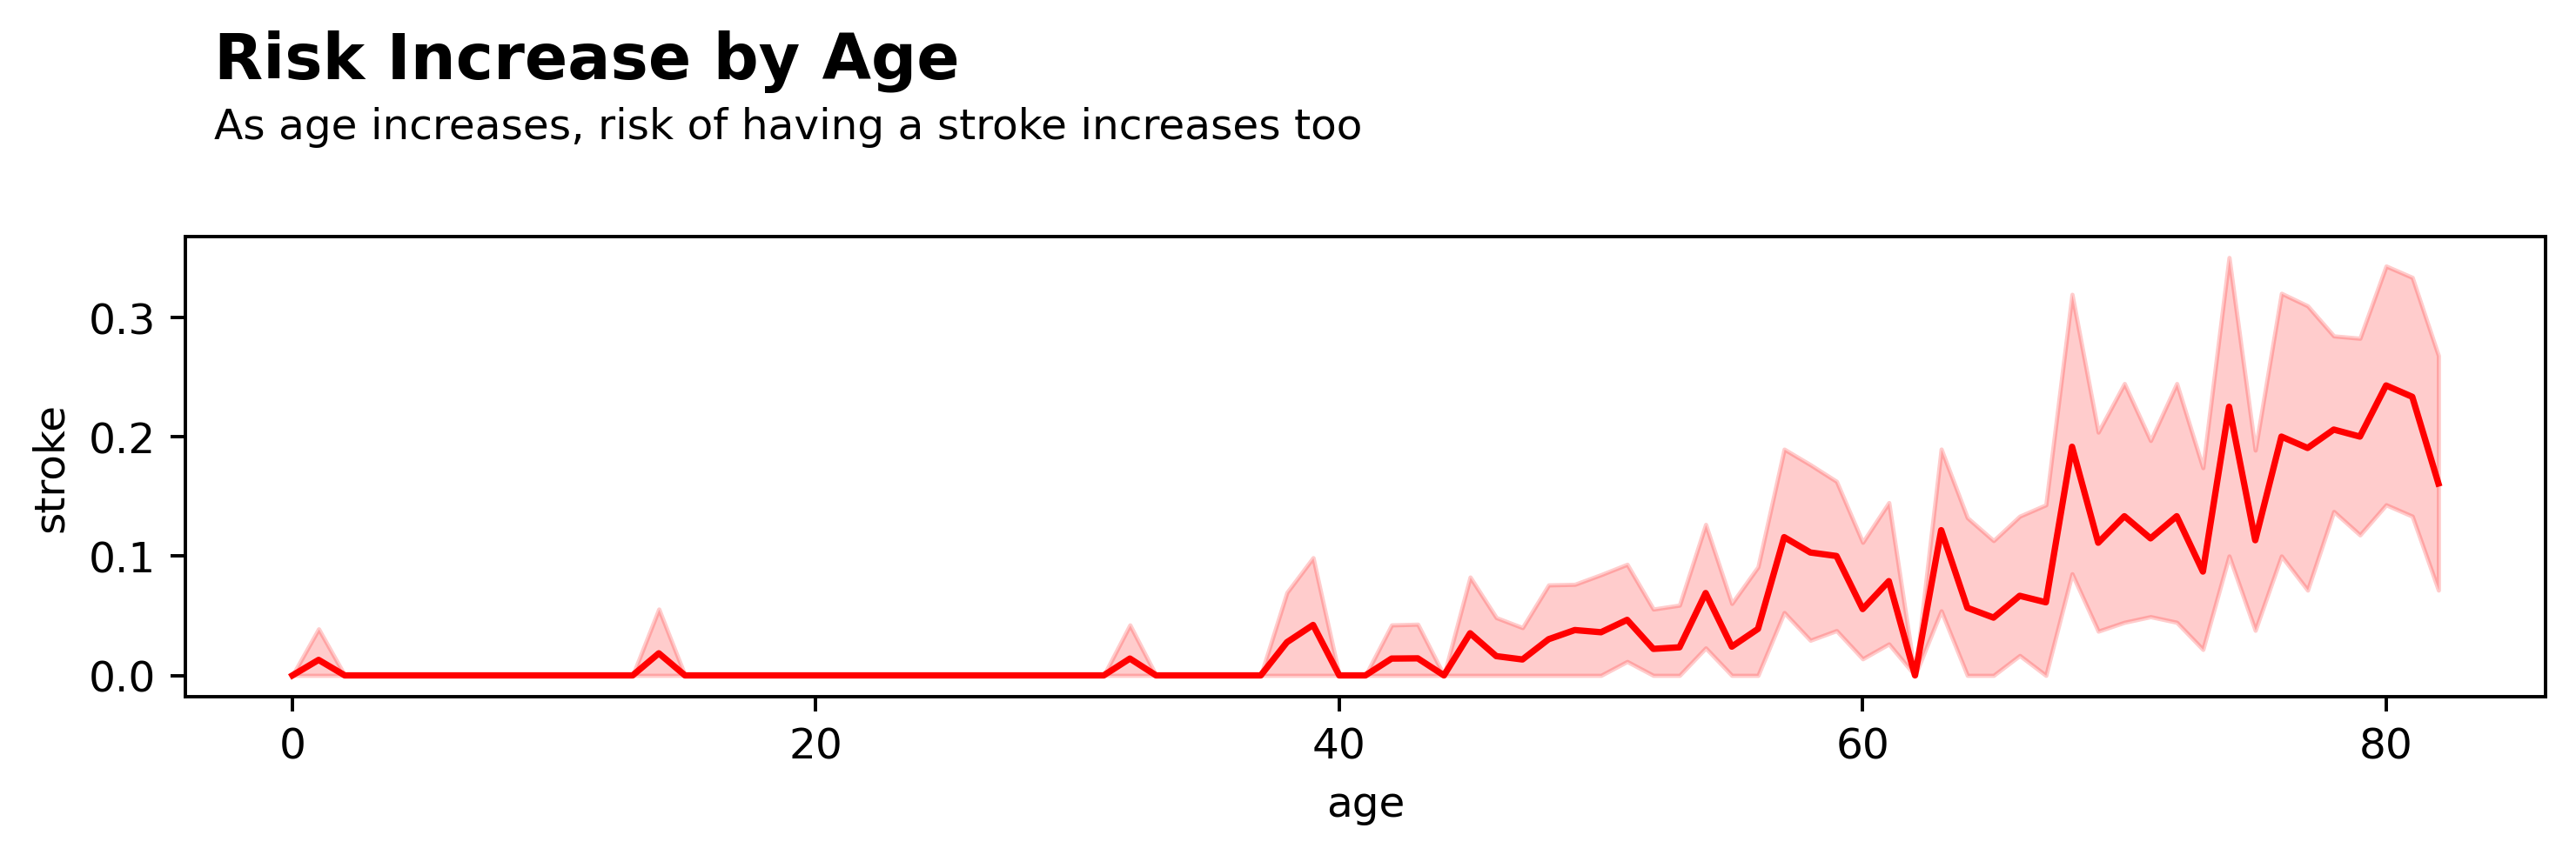

In [7]:
# Creating figure
figure = plt.figure(figsize=(10, 5), dpi=350)
gs = figure.add_gridspec(2, 1)
gs.update(wspace=0.11, hspace=0.5)
stroke = figure.add_subplot(gs[0, 0])

# Converting age type to integer
df_copy['age'] = df_copy['age'].astype(int)

# Creating lineplot 
sns.lineplot(df_copy['age'],df_copy['stroke'],color='red',ax=stroke)

# Adding plot Title and subtitle
stroke.text(-3,0.5,'Risk Increase by Age',fontsize=15,fontweight='bold')
stroke.text(-3,0.45,'As age increases, risk of having a stroke increases too',fontsize=10)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


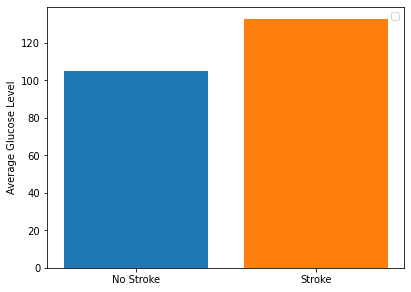

In [8]:
# Determining the average glucose level between those who had strokes vs no strokes
# Separating people who had strokes and who did not
no_stroke = df[df["stroke"] == 0]
stroke = df[df["stroke"] == 1]

# create figure and axis objects
fig, ax = plt.subplots() 
fig.set_size_inches(6.4,4.8)

# Creating bar chart
ax.bar("No Stroke", no_stroke['avg_glucose_level'].mean()) 
ax.bar("Stroke", stroke['avg_glucose_level'].mean()) 

# Setting y axis label
ax.set_ylabel("Average Glucose Level")

ax.legend() # add a legend
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


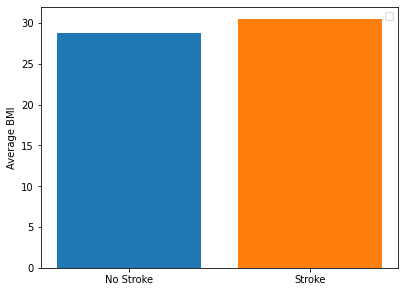

In [9]:
# Determining the average bmi between those who had strokes vs no strokes

# create figure and axis objects
fig, ax = plt.subplots() # create figure and axis objects
fig.set_size_inches(6.4,4.8)

# Creating bar chart
ax.bar("No Stroke", no_stroke['bmi'].mean()) 
ax.bar("Stroke", stroke['bmi'].mean()) 

# Setting y axis label
ax.set_ylabel("Average BMI")

ax.legend() # add a legend
plt.show()

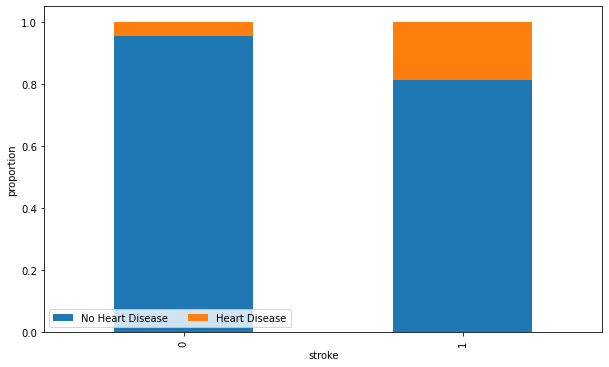

In [10]:
# Comparing proportions of correlation between stroke and heart disease 
ct = pd.crosstab(index = df['stroke'], columns = df['heart_disease'], normalize="index")

ct.plot(kind='bar', stacked = True, figsize=(10,6))

plt.legend(['No Heart Disease','Heart Disease'], loc="lower left", ncol=2)
plt.xlabel("stroke")
plt.ylabel("proportion")
plt.show()

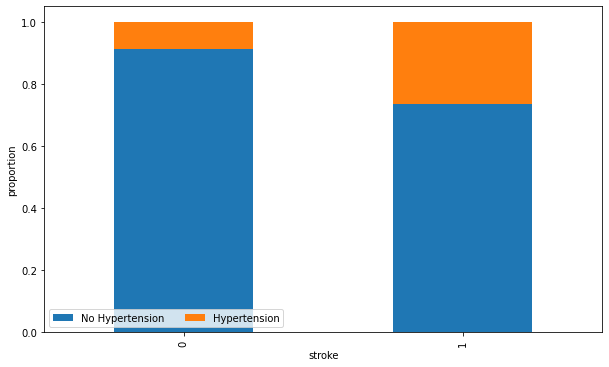

In [11]:
# Comparing proportions of correlation between stroke and heart disease 
ct = pd.crosstab(index = df_copy['stroke'], columns = df_copy['hypertension'], normalize="index")

ct.plot(kind='bar', stacked = True, figsize=(10,6))

plt.legend(['No Hypertension','Hypertension'], loc="lower left", ncol=2)
plt.xlabel("stroke")
plt.ylabel("proportion")
plt.show()

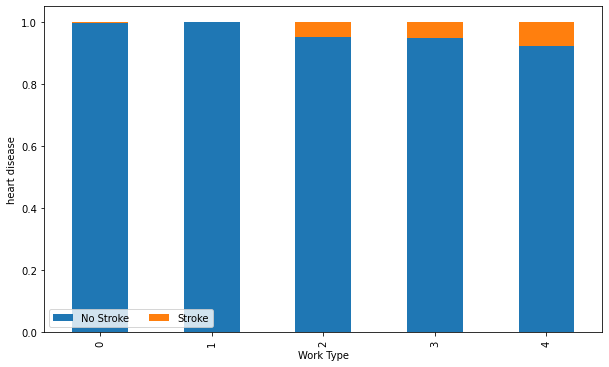

In [12]:
# Comparing proportions of correlation between stroke and heart disease 
ct = pd.crosstab(index = df_copy['work_type'], columns = df_copy['stroke'], normalize="index")

ct.plot(kind='bar', stacked = True, figsize=(10,6))

plt.legend(['No Stroke','Stroke'], loc="lower left", ncol=2)
plt.xlabel("Work Type")
plt.ylabel("heart disease")
plt.show()

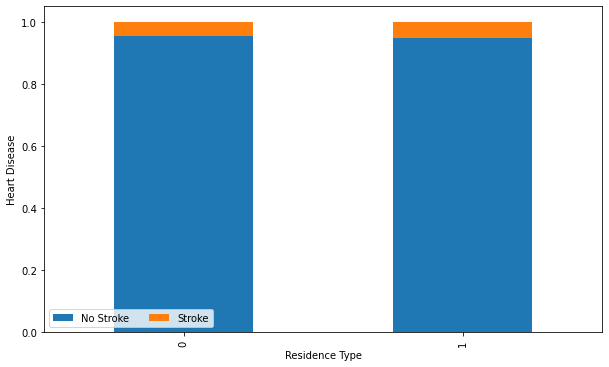

In [13]:
# Comparing proportions of correlation between stroke and heart disease 
ct = pd.crosstab(index = df_copy['Residence_type'], columns = df_copy['stroke'], normalize="index")

ct.plot(kind='bar', stacked = True, figsize=(10,6))

plt.legend(['No Stroke','Stroke'], loc="lower left", ncol=2)
plt.xlabel("Residence Type")
plt.ylabel("Heart Disease")
plt.show()

## 5. Supervised Learning

In [14]:
X  = df_copy[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type','avg_glucose_level', 'bmi', 'smoking_status']]
y = df_copy['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

# Oversampling training data
sm = SMOTE(random_state=4)
X_oversample, y_oversample = sm.fit_resample(X_train, y_train.ravel())

In [15]:
# Defining function to use different machine learning models
def Method(model):
    model.fit(X_oversample,y_oversample) # fitting oversampled data
    score = model.score(X_test, y_test) # finding model score
    print('Testing Score \n',score)
    y_pred = model.predict(X_test) # predicting over test values
    print(confusion_matrix(y_test,y_pred)) # printing confusion matrix
    print(classification_report(y_test, y_pred)) # printing classification matrix
    plt.figure(figsize = (10,7)) 
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    #Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    #Plot the diagnal line
    plt.figure(figsize = (10,7))
    plt.plot([0, 1], [0, 1], 'k--')
    #Plot the ROC curve with `fpr` on the x-axis and `tpr` on the y-axis.
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    # Compute and print AUC score
    auc = roc_auc_score(y_test, y_pred_prob)
    print("AUC: {}".format(auc))


Testing Score 
 0.7941943900848011
[[2345  568]
 [  63   90]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2913
           1       0.14      0.59      0.22       153

    accuracy                           0.79      3066
   macro avg       0.56      0.70      0.55      3066
weighted avg       0.93      0.79      0.85      3066



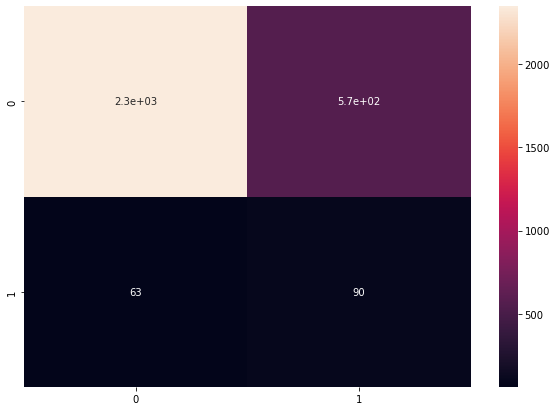

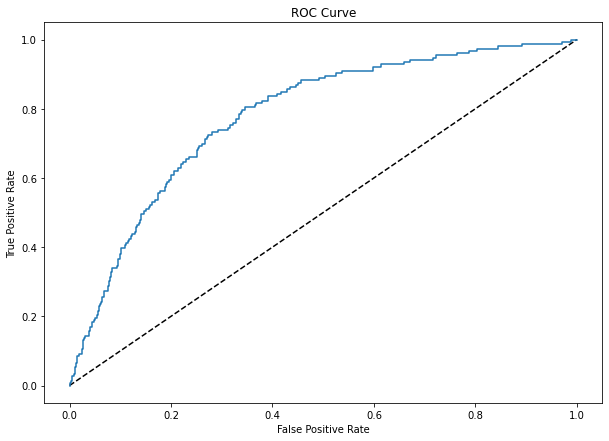

AUC: 0.7785473727195421


In [16]:
# Using Logistic Regression to predict Occurrence of Strokes
logreg=LogisticRegression(solver='liblinear', random_state=10)
Method(logreg)

Testing Score 
 0.7426614481409002
[[2178  735]
 [  54   99]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      2913
           1       0.12      0.65      0.20       153

    accuracy                           0.74      3066
   macro avg       0.55      0.70      0.52      3066
weighted avg       0.93      0.74      0.81      3066



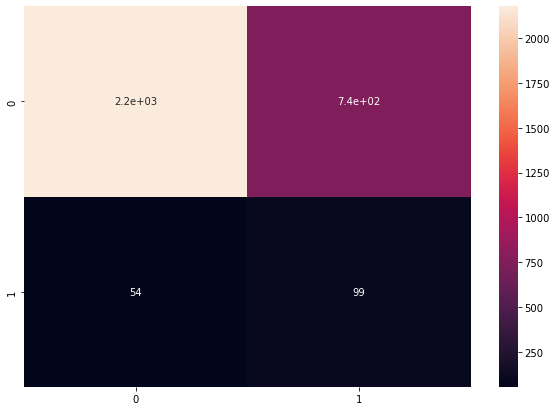

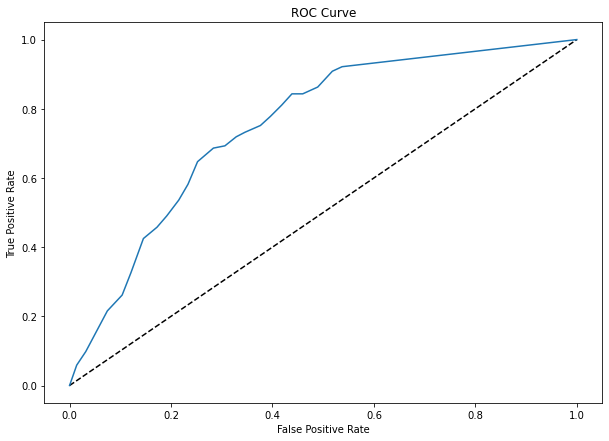

AUC: 0.7522128659222014


In [17]:
# Using kNN to predict Occurrence of Strokes
knn = KNeighborsClassifier(24)
Method(knn)

Testing Score 
 0.8796477495107632
[[2672  241]
 [ 128   25]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2913
           1       0.09      0.16      0.12       153

    accuracy                           0.88      3066
   macro avg       0.52      0.54      0.53      3066
weighted avg       0.91      0.88      0.89      3066



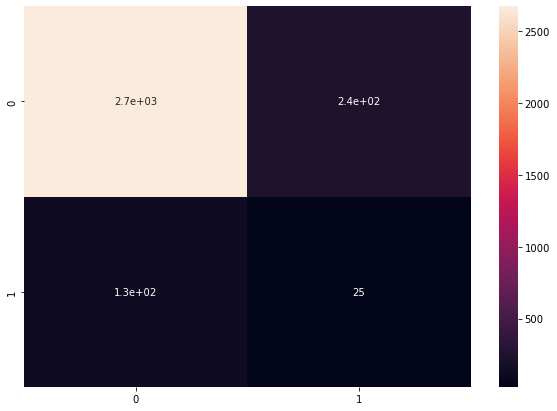

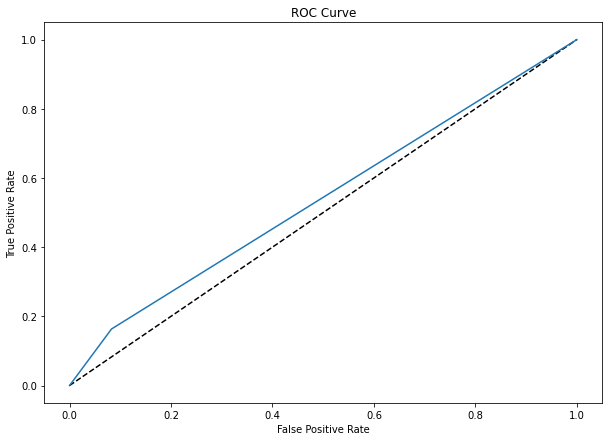

AUC: 0.5403330573561386


In [18]:
# Using Decision Tree to predict Occurrence of Strokes
dectree=DecisionTreeClassifier(random_state=10)
Method(dectree)